<a href="https://colab.research.google.com/github/yasinsoylu1997/NLP-PROJELER-TOPLU/blob/main/BERT_1_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-text
!pip install tf-models-official

     |████████████████████████████████| 4.9 MB 2.8 MB/s 
     |████████████████████████████████| 1.8 MB 2.1 MB/s 
     |████████████████████████████████| 90 kB 9.5 MB/s 
     |████████████████████████████████| 596 kB 26.9 MB/s 
     |████████████████████████████████| 1.2 MB 27.0 MB/s 
     |████████████████████████████████| 213 kB 52.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
     |████████████████████████████████| 99 kB 9.1 MB/s 
     |████████████████████████████████| 352 kB 44.6 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=199a4c5bb085c8ab8e6ed060589c01cdccda57f77fb59ee1e46b40066dae9bf9
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=4a6220ae46059a6d36

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('sample.csv')
data=dataset[["yildizSayisi","yorum"]]


In [4]:
data

,yildizSayisi,yorum
0,1,İlk ürünüm sorunsuz geldi lakin bunda prize ta...
1,1,Ürünü teslim aldığım günün ertesi iade için ka...
2,1,kesinlikle beğenmedim kullanmaya başladıktan 1...
3,1,Merhaba ürün elime ulaştı ama ürün bir çalışıy...
4,1,kargo hızlı o konuda haksızlık yapamam ama ürü...
...,...,...
49995,5,Çok güzel çok beğendim tafsiye ederim
49996,5,Vallahi çok işime yaradı. Aylarda öyle boşuna ...
49997,5,"olması gerektigi gibi , kenarda hazırda beklem..."
49998,5,arçelik bulaşık makinesi için aldım servis olm...


In [5]:
dataset = pd.read_csv('sample.csv')
def sentiments(df):
  if df['yildizSayisi'] > 3.9:
    return 'Positive'
  elif df['yildizSayisi'] <= 3.0:
    return 'Negative'
data['sentiment'] = data.apply(sentiments, axis=1)

In [6]:
data

,yildizSayisi,yorum,sentiment
0,1,İlk ürünüm sorunsuz geldi lakin bunda prize ta...,Negative
1,1,Ürünü teslim aldığım günün ertesi iade için ka...,Negative
2,1,kesinlikle beğenmedim kullanmaya başladıktan 1...,Negative
3,1,Merhaba ürün elime ulaştı ama ürün bir çalışıy...,Negative
4,1,kargo hızlı o konuda haksızlık yapamam ama ürü...,Negative
...,...,...,...
49995,5,Çok güzel çok beğendim tafsiye ederim,Positive
49996,5,Vallahi çok işime yaradı. Aylarda öyle boşuna ...,Positive
49997,5,"olması gerektigi gibi , kenarda hazırda beklem...",Positive
49998,5,arçelik bulaşık makinesi için aldım servis olm...,Positive


In [7]:
data=data[["yorum","sentiment"]]

In [8]:
labeling = {
    'Positive':1, 
    'Negative':0
}

data['sentiment'] = data['sentiment'].apply(lambda x : labeling[x])
# Output first ten rows
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yorum,sentiment
0,İlk ürünüm sorunsuz geldi lakin bunda prize ta...,0
1,Ürünü teslim aldığım günün ertesi iade için ka...,0
2,kesinlikle beğenmedim kullanmaya başladıktan 1...,0
3,Merhaba ürün elime ulaştı ama ürün bir çalışıy...,0
4,kargo hızlı o konuda haksızlık yapamam ama ürü...,0
5,Ürünü çalıştırdıktan 5 dakika sonra kendiliğin...,0
6,Cok cok kötü sacımın ucları yanık gibi oldu as...,0
7,Kesinlikle almayın arkadaşlar.Kablosunda hassa...,0
8,Buna bir yıldız bile fazla arkadaşlar almayın ...,0
9,Ûrûn den hiç memnun değilim aldım denedik düzl...,0


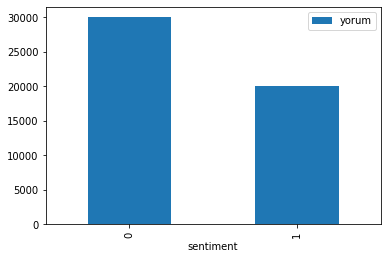

In [9]:
data.groupby('sentiment').count().plot(kind='bar')


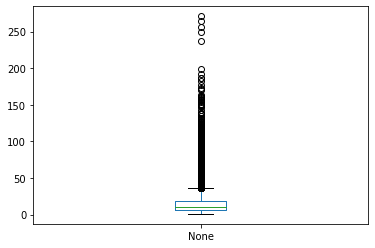

In [10]:
# Calculate review lengths
review_len = pd.Series([len(yorum.split()) for yorum	 in data['yorum']])

# The distribution of review text lengths
review_len.plot(kind='box')

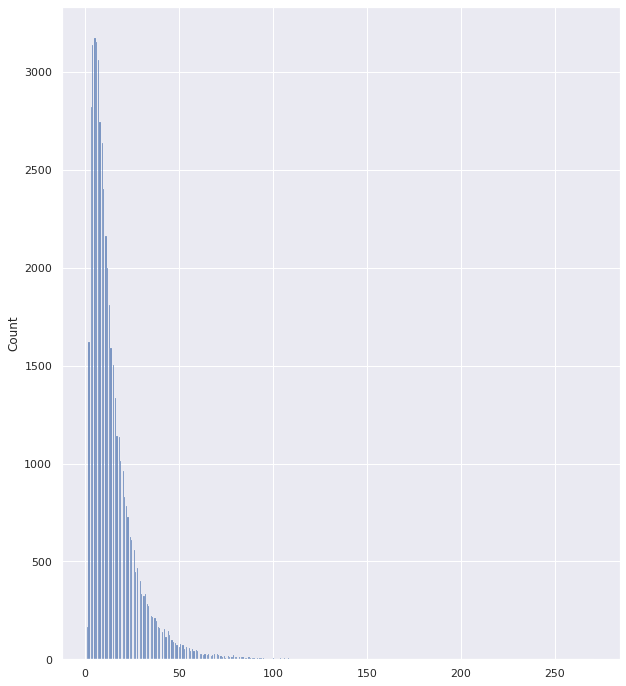

In [11]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (10,12))
sns.histplot(review_len)

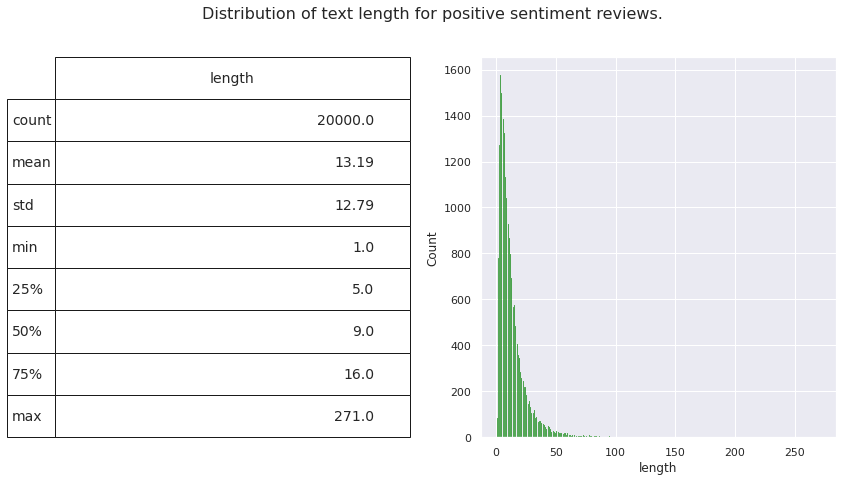

In [12]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.yorum.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']==1]['length'], ax=ax1,color='green')
describe = data.length[data.sentiment==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16)

plt.show()

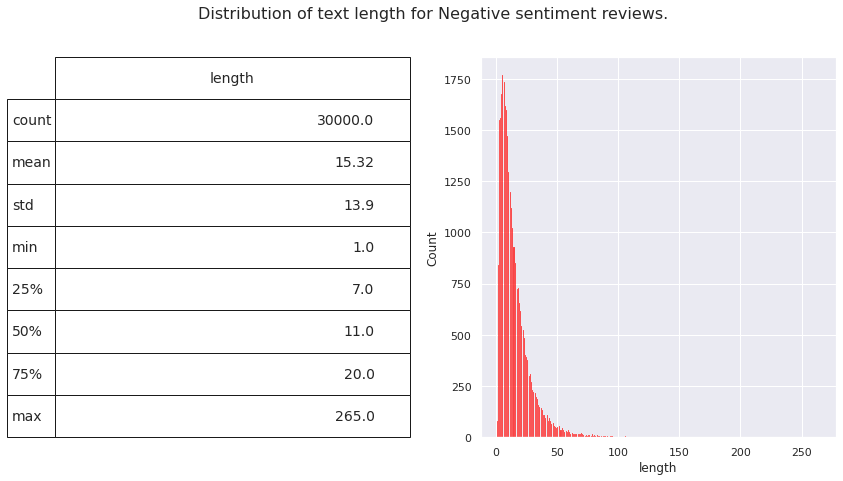

In [13]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']==0]['length'], ax=ax1,color='red')
describe = data.length[data.sentiment==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=16)

plt.show()

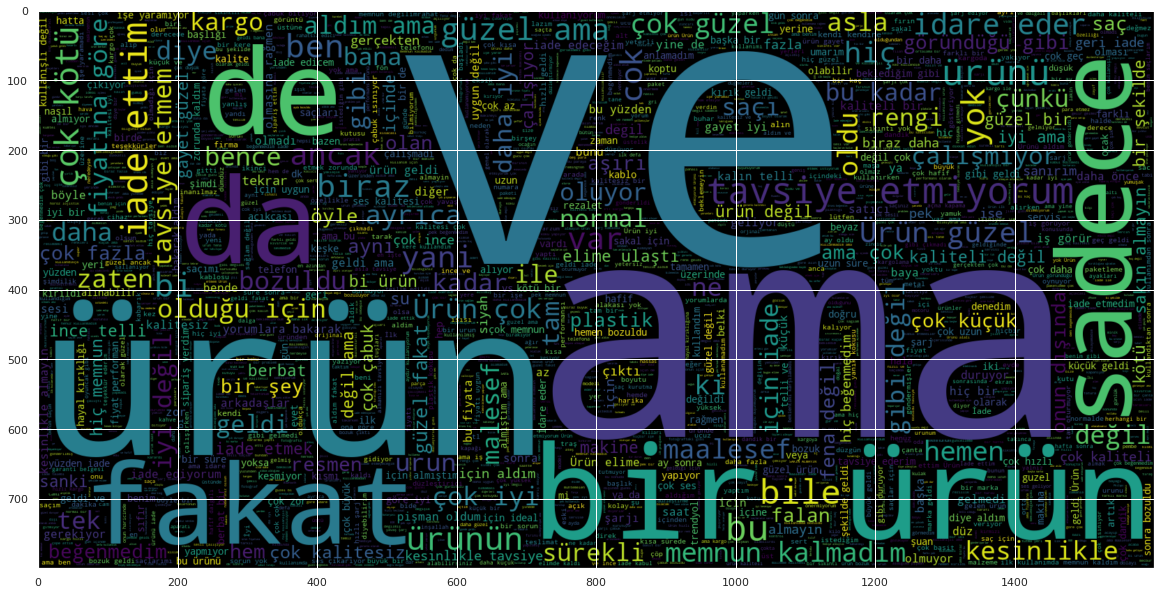

In [14]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].yorum))
plt.imshow(wc , interpolation = 'bilinear')

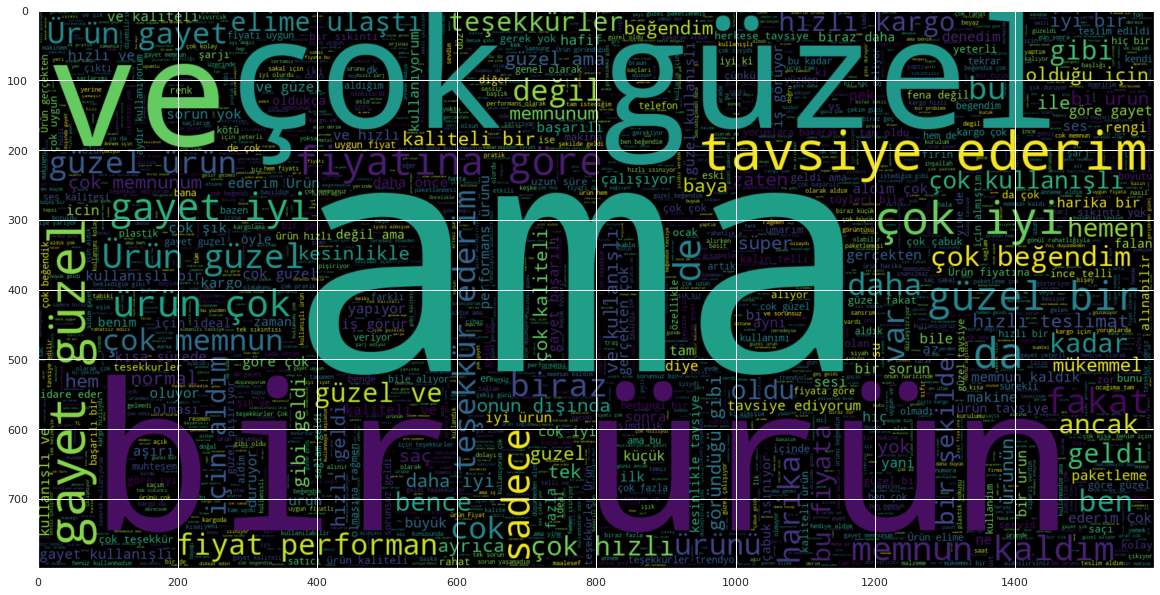

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 1].yorum))
plt.imshow(wc , interpolation = 'bilinear')

# Yeni Bölüm

In [16]:
#bert

In [17]:
bert_model_name = 'dbmdz/bert-base-turkish-uncased'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [18]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)


In [19]:
text_test = ['gayet güzel bir ürün']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  5637  3388 19739 12638 12170  2099 24471  4609   102     0     0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)


In [21]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [22]:
classifier_model = build_classifier_model()


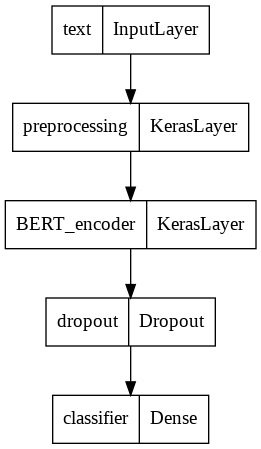

In [23]:
tf.keras.utils.plot_model(classifier_model)


In [24]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [25]:
epochs = 10
steps_per_epoch = 625 #tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [26]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [27]:
X = data['yorum']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.yorum,data.sentiment, test_size=0.2, random_state=1)

In [28]:


X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1) # 0.25 x 0.8 = 0.2


print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_val)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Number of reviews in the total set : 50000
Number of reviews in the training set : 32000
Number of reviews in the validation set : 8000
Number of reviews in the testing set : 10000


In [29]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
1000/1000 [==============================] - 437s 428ms/step - loss: 0.5377 - binary_accuracy: 0.7241 - val_loss: 0.4807 - val_binary_accuracy: 0.8094
Epoch 2/10
1000/1000 [==============================] - 428s 428ms/step - loss: 0.4002 - binary_accuracy: 0.8184 - val_loss: 0.3856 - val_binary_accuracy: 0.8372
Epoch 3/10
1000/1000 [==============================] - 428s 428ms/step - loss: 0.3608 - binary_accuracy: 0.8388 - val_loss: 0.3930 - val_binary_accuracy: 0.8465
Epoch 4/10
1000/1000 [==============================] - 429s 429ms/step - loss: 0.3272 - binary_accuracy: 0.8569 - val_loss: 0.3851 - val_binary_accuracy: 0.8471
Epoch 5/10
1000/1000 [==============================] - 429s 429ms/step - loss: 0.3003 - binary_accuracy: 0.8694 - val_loss: 0.3917 - val_binary_accuracy: 0.8470
Epoch 6/10
1000/1000 [==============================] - 428s 428ms/step - loss: 0.2763 - binary_ac

In [35]:

loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 56s 180ms/step - loss: 0.3923 - binary_accuracy: 0.8529
Loss: 0.39234885573387146
Accuracy: 0.8529000282287598


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


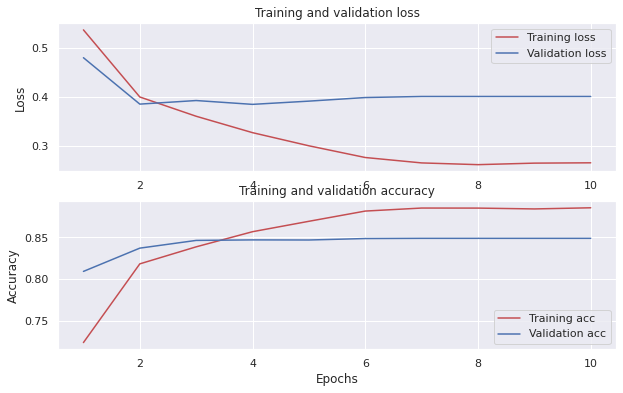

In [36]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [32]:
dataset_name = 'hepsiburada_2'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

INFO:tensorflow:Assets written to: ./hepsiburada_2_bert/assets


INFO:tensorflow:Assets written to: ./hepsiburada_2_bert/assets


In [33]:
reloaded_model = tf.saved_model.load(saved_model_path)


In [41]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'çok güzel bir ürün herkese tavsiye ederim',  # this is the same sentence tried earlier
    'çok başarılı bir ürün',
    'berbat hiç güzel değil ',
    'göründüğü gibi değil iade edicem ',
    'harika ötesi',
    'ilk aldığım zamanlar güzeldi fakat çabuk bozuldu',
    'ürün gayet güzel fakat kargolama eh işte',
    'dalga geçiyorlar galiba bu ne aq'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: çok güzel bir ürün herkese tavsiye ederim : score: 0.969263
input: çok başarılı bir ürün          : score: 0.978885
input: berbat hiç güzel değil         : score: 0.003658
input: göründüğü gibi değil iade edicem  : score: 0.013867
input: harika ötesi                   : score: 0.964949
input: ilk aldığım zamanlar güzeldi fakat çabuk bozuldu : score: 0.007728
input: ürün gayet güzel fakat kargolama eh işte : score: 0.579786
input: dalga geçiyorlar galiba bu ne aq : score: 0.035284

Results from the model in memory:
input: çok güzel bir ürün herkese tavsiye ederim : score: 0.969263
input: çok başarılı bir ürün          : score: 0.978885
input: berbat hiç güzel değil         : score: 0.003658
input: göründüğü gibi değil iade edicem  : score: 0.013867
input: harika ötesi                   : score: 0.964949
input: ilk aldığım zamanlar güzeldi fakat çabuk bozuldu : score: 0.007728
input: ürün gayet güzel fakat kargolama eh işte : score: 0.579787
input: da